<a href="https://colab.research.google.com/github/gimikk/Colorization_for_BuddistArt/blob/master/%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# pytorch 설치 명령어 입니다
!pip3 install torch torchvision

    100% |████████████████████████████████| 591.8MB 23kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x60b68000 @  0x7f424a06e2a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 61kB 23.4MB/s 
    100% |████████████████████████████████| 2.0MB 4.2MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[[ 32.50234527  31.70700585]
 [ 53.42680403  68.77759598]
 [ 61.53035803  62.5623823 ]
 [ 47.47563963  71.54663223]
 [ 59.81320787  87.23092513]
 [ 55.14218841  78.21151827]
 [ 52.21179669  79.64197305]
 [ 39.29956669  59.17148932]
 [ 48.10504169  75.3312423 ]
 [ 52.55001444  71.30087989]
 [ 45.41973014  55.16567715]
 [ 54.35163488  82.47884676]
 [ 44.1640495   62.00892325]
 [ 58.16847072  75.39287043]
 [ 56.72720806  81.43619216]
 [ 48.95588857  60.72360244]
 [ 44.68719623  82.89250373]
 [ 60.29732685  97.37989686]
 [ 45.61864377  48.84715332]
 [ 38.81681754  56.87721319]
 [ 66.18981661  83.87856466]
 [ 65.41605175 118.5912173 ]
 [ 47.48120861  57.25181946]
 [ 41.57564262  51.39174408]
 [ 51.84518691  75.38065167]
 [ 59.37082201  74.76556403]
 [ 57.31000344  95.45505292]
 [ 63.61556125  95.22936602]
 [ 46.73761941  79.05240617]
 [ 50.55676015  83.43207142]

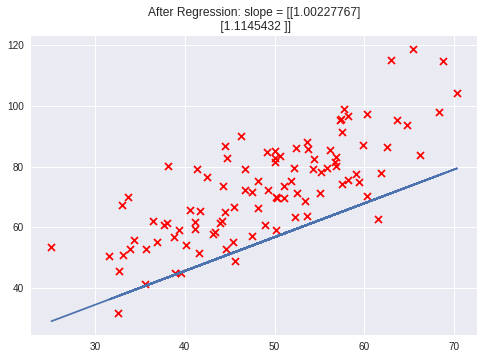

204.50666115574757


In [61]:
# Linear Regression
# numpy는 numerical python의 약자로 행렬 계산에 특화된 package
# matplotlib는 graph를 그려주는 등의 시각화 package
# pandas는 데이터 분석, 데이터 처리를 위해 만들어진 package
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
# 구글 드라이브에 csv 파일(엑셀)을 저장, 드라이브로 부터 읽어오는 함수
# 구글 드라이브에 연결하기 위해 authorize 해야함!
from google.colab import drive 
drive.mount('/content/gdrive')

def loadData(fileName):
  # np.loadtxt 함수로 csv 파일을 읽는다, delimiter는 파싱할 기준(,)
  data = np.matrix(np.loadtxt(fname=fileName, delimiter=','))
  # print를 찍어 데이터가 어떤지 확인해 보자
  print(data)
  # .shape를 이용해 shape를 알 수 있다.(모양)
  print(data.shape)
  # data행렬을 이해하고 그려보자!
  return (data[:, 0], data[:, 1])

def GradientDescent(X, Y, theta, alpha, num_iters):
    m = np.size(Y)
    hx = np.matmul(X, theta)
    c1 = Cost(theta, X, Y)
    for i in range(0, num_iters):
        # gradient를 구해준다 c2
        temp = (alpha / m) * np.matmul(X.T, (hx - Y))
        c2 = Cost(theta - temp, X, Y)
        
        # c1과 c2를 비교해 gradient 변화량이 더 작은걸 넣어준다.
        if c1 > c2:
            c1 = c2
            theta = theta - temp
    
    return theta

def Cost(theta, X, Y):
    m = Y.size
    hx = np.matmul(X, theta)
    return np.sum(np.power(np.subtract(hx, Y), 2)) / (2 * m)  

# csv 파일을 불러들이는 코드
train_f = 'gdrive/My Drive/linear_regression_train.csv'

X, Y = loadData(train_f)

# train 부분
# m에 데이터셋의 총 크기를 담는다.
m = Y.size
t = X
X = np.hstack((np.matrix(np.ones(m).reshape(m, 1)), t))
print(X)

theta = np.matrix(np.ones(2).reshape(2, 1))
theta = GradientDescent(X, Y, theta, 0.000001, 100)
Cost(theta, X, Y)
# print(theta)
plt.scatter(np.array(t), np.array(Y), marker = 'x', color='r')
plt.plot(np.array(t),np.array(np.matmul(X, theta)))
plt.title("After Regression: slope = " + str(theta))
plt.show()
# cost 함수 값 확인
print(Cost(theta, X, Y))


In [72]:
# Softmax Classifier
import numpy
 
def sigmoid(x):
    return 1. / (1 + numpy.exp(-x))

def softmax(x):
    e = numpy.exp(x - numpy.max(x)) 
    if e.ndim == 1:
        return e / numpy.sum(e, axis=0)
    else:  
        return e / numpy.array([numpy.sum(e, axis=1)]).T  # ndim = 2

class LogisticRegression(object):
    def __init__(self, input, label, n_in, n_out):
        self.x = input
        self.y = label
        self.W = numpy.zeros((n_in, n_out))  # initialize W 0
        self.b = numpy.zeros(n_out)          # initialize bias 0

        # self.params = [self.W, self.b]

    def train(self, lr=0.1, input=None, L2_reg=0.00):
        if input is not None:
            self.x = input

        # p_y_given_x = sigmoid(numpy.dot(self.x, self.W) + self.b)
        p_y_given_x = softmax(numpy.dot(self.x, self.W) + self.b)
        d_y = self.y - p_y_given_x
        
        self.W += lr * numpy.dot(self.x.T, d_y) - lr * L2_reg * self.W
        self.b += lr * numpy.mean(d_y, axis=0)
        
        # cost = self.negative_log_likelihood()
        # return cost

    def negative_log_likelihood(self):
        # sigmoid_activation = sigmoid(numpy.dot(self.x, self.W) + self.b)
        sigmoid_activation = softmax(numpy.dot(self.x, self.W) + self.b)

        cross_entropy = - numpy.mean(
            numpy.sum(self.y * numpy.log(sigmoid_activation) +
            (1 - self.y) * numpy.log(1 - sigmoid_activation),
                      axis=1))

        return cross_entropy


    def predict(self, x):
        # return sigmoid(numpy.dot(x, self.W) + self.b)
        return softmax(numpy.dot(x, self.W) + self.b)


# training data
x = numpy.array([[1, 0, 0],
                 [0, 1, 0],
                 [0, 0, 1]])
y = numpy.array([[1, 0, 0],
                 [0, 1, 0],
                 [0, 0, 1]])

# construct LogisticRegression
classifier = LogisticRegression(input=x, label=y, n_in=3, n_out=3)

# train
for epoch in range(n_epochs):
  classifier.train(lr=learning_rate)
  cost = classifier.negative_log_likelihood()
  print('Training epoch %d, cost is ' % epoch, cost)
  learning_rate *= 0.95

# test
x = numpy.array([1, 0, 0])
print('predict : ', classifier.predict(x))
x = numpy.array([0, 1, 0])
print('predict :', classifier.predict(x))
x = numpy.array([0, 0, 1])
print('predict :', classifier.predict(x))
    

Training epoch 0, cost is  1.8995508752660737
Training epoch 1, cost is  1.8901060820930937
Training epoch 2, cost is  1.8811762090490756
Training epoch 3, cost is  1.8727313731152908
Training epoch 4, cost is  1.8647435821982998
Training epoch 5, cost is  1.8571866034289393
Training epoch 6, cost is  1.850035841338275
Training epoch 7, cost is  1.8432682251641357
Training epoch 8, cost is  1.8368621045900317
Training epoch 9, cost is  1.8307971532656824
Training epoch 10, cost is  1.825054279504399
Training epoch 11, cost is  1.8196155435966974
Training epoch 12, cost is  1.8144640812215667
Training epoch 13, cost is  1.8095840324764652
Training epoch 14, cost is  1.8049604760844407
Training epoch 15, cost is  1.8005793683715787
Training epoch 16, cost is  1.7964274866404875
Training epoch 17, cost is  1.792492376595594
Training epoch 18, cost is  1.7887623035039697
Training epoch 19, cost is  1.7852262068010996
Training epoch 20, cost is  1.7818736578747778
Training epoch 21, cost is

In [0]:
# Neural Network
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters(사용자가 지정해주는 파라미터)
#input_size는 28*28 이미지 -> 784차원의 벡터로 표현 가능
input_size = 784
# hidden_size는 중간 hidden layer의 depth
hidden_size = 500
# 최종 class(10개)
num_classes = 10
# 몇번이나 데이터셋을 돌릴것인가? 
num_epochs = 5
# 한번에 학습시키는데 몇장의 이미지를 넣을것인가?
batch_size = 100
# 코스트 함수에서의 알파값을 의미
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        # neural net 설계
        # nn.Linear는 fully cunnected layer를 의미한다
        # nn.Linear의 인풋 파라미터로는 입력depth와 출력 depth
        # 만을 입력해주면 알아서 해준다
        self.fc1 = nn.Linear(input_size, hidden_size) 
        # relu 함수를 통해 다음 레이어로 feature를 전달해준다.
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    # 앞으로 전달
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
# Cross-Entropy을 loss로 사용
# optimizer는 Adam이라는 optimizer로 성능이 좋아 기본으로 사용된다.
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
# len 함수를 통해 데이터셋의 총 갯수를 알수 있다
total_step = len(train_loader)
for epoch in range(num_epochs):
    # enumerate 함수는 train_loader에서 i와 같은 카운트를 할 수 있도록 도와줌
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # optimizer의 gradient를 초기화해준다
        optimizer.zero_grad()
        # backpropagation을 해준다
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
# 정확한 accuracy 측정을 위해 test셋을 이용해 test를 진행시킨다
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))



Epoch [1/5], Step [100/600], Loss: 0.3152
Epoch [1/5], Step [200/600], Loss: 0.1460
Epoch [1/5], Step [300/600], Loss: 0.2947
Epoch [1/5], Step [400/600], Loss: 0.1806
Epoch [1/5], Step [500/600], Loss: 0.1333
Epoch [1/5], Step [600/600], Loss: 0.2735
Epoch [2/5], Step [100/600], Loss: 0.2332
Epoch [2/5], Step [200/600], Loss: 0.1389
Epoch [2/5], Step [300/600], Loss: 0.0905
Epoch [2/5], Step [400/600], Loss: 0.1161
Epoch [2/5], Step [500/600], Loss: 0.1753
Epoch [2/5], Step [600/600], Loss: 0.0467
Epoch [3/5], Step [100/600], Loss: 0.0737
Epoch [3/5], Step [200/600], Loss: 0.0900
Epoch [3/5], Step [300/600], Loss: 0.0348
Epoch [3/5], Step [400/600], Loss: 0.0464
Epoch [3/5], Step [500/600], Loss: 0.0709
Epoch [3/5], Step [600/600], Loss: 0.0492
Epoch [4/5], Step [100/600], Loss: 0.0489
Epoch [4/5], Step [200/600], Loss: 0.0574
Epoch [4/5], Step [300/600], Loss: 0.0329
Epoch [4/5], Step [400/600], Loss: 0.0758
Epoch [4/5], Step [500/600], Loss: 0.0162
Epoch [4/5], Step [600/600], Loss:

In [0]:
# CNN 
# neural net과 마찬가지로 혼자서 분석해보자!
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        # nn.Sequential 모듈을 이용해 간단하게 표현해 줄 수 있다
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))


Epoch [1/5], Step [100/600], Loss: 0.2512
Epoch [1/5], Step [200/600], Loss: 0.1171
Epoch [1/5], Step [300/600], Loss: 0.0788
Epoch [1/5], Step [400/600], Loss: 0.0769
Epoch [1/5], Step [500/600], Loss: 0.0181
Epoch [1/5], Step [600/600], Loss: 0.0281
Epoch [2/5], Step [100/600], Loss: 0.0779
Epoch [2/5], Step [200/600], Loss: 0.0299
Epoch [2/5], Step [300/600], Loss: 0.0539
Epoch [2/5], Step [400/600], Loss: 0.0143
Epoch [2/5], Step [500/600], Loss: 0.0116
Epoch [2/5], Step [600/600], Loss: 0.0337
Epoch [3/5], Step [100/600], Loss: 0.0334
Epoch [3/5], Step [200/600], Loss: 0.0297
Epoch [3/5], Step [300/600], Loss: 0.0156
Epoch [3/5], Step [400/600], Loss: 0.0257
Epoch [3/5], Step [500/600], Loss: 0.0255
Epoch [3/5], Step [600/600], Loss: 0.0133
Epoch [4/5], Step [100/600], Loss: 0.0249
Epoch [4/5], Step [200/600], Loss: 0.0029
Epoch [4/5], Step [300/600], Loss: 0.0267
Epoch [4/5], Step [400/600], Loss: 0.0207
Epoch [4/5], Step [500/600], Loss: 0.0674
Epoch [4/5], Step [600/600], Loss:

In [0]:
# GAN
import os
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
from torchvision.utils import save_image


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
latent_size = 64
hidden_size = 256
image_size = 784
num_epochs = 200
batch_size = 100
sample_dir = 'samples'

# Create a directory if not exists
if not os.path.exists(sample_dir):
    os.makedirs(sample_dir)

# Image processing
transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize(mean=(0.5, 0.5, 0.5),   # 3 for RGB channels
                                     std=(0.5, 0.5, 0.5))])

# MNIST dataset
mnist = torchvision.datasets.MNIST(root='../../data/',
                                   train=True,
                                   transform=transform,
                                   download=True)

# Data loader
data_loader = torch.utils.data.DataLoader(dataset=mnist,
                                          batch_size=batch_size, 
                                          shuffle=True)

# Discriminator
D = nn.Sequential(
    nn.Linear(image_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid())

# Generator 
G = nn.Sequential(
    nn.Linear(latent_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, image_size),
    nn.Tanh())

# Device setting
D = D.to(device)
G = G.to(device)

# Binary cross entropy loss and optimizer
criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0002)
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0002)

def denorm(x):
    out = (x + 1) / 2
    return out.clamp(0, 1)

def reset_grad():
    d_optimizer.zero_grad()
    g_optimizer.zero_grad()

# Start training
total_step = len(data_loader)
for epoch in range(num_epochs):
    for i, (images, _) in enumerate(data_loader):
        images = images.reshape(batch_size, -1).to(device)
        
        # Create the labels which are later used as input for the BCE loss
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # ================================================================== #
        #                      Train the discriminator                       #
        # ================================================================== #

        # Compute BCE_Loss using real images where BCE_Loss(x, y): - y * log(D(x)) - (1-y) * log(1 - D(x))
        # Second term of the loss is always zero since real_labels == 1
        outputs = D(images)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs
        
        # Compute BCELoss using fake images
        # First term of the loss is always zero since fake_labels == 0
        z = torch.randn(batch_size, latent_size).to(device)
        fake_images = G(z)
        outputs = D(fake_images)
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs
        
        # Backprop and optimize
        d_loss = d_loss_real + d_loss_fake
        reset_grad()
        d_loss.backward()
        d_optimizer.step()
        
        # ================================================================== #
        #                        Train the generator                         #
        # ================================================================== #

        # Compute loss with fake images
        z = torch.randn(batch_size, latent_size).to(device)
        fake_images = G(z)
        outputs = D(fake_images)
        
        # We train G to maximize log(D(G(z)) instead of minimizing log(1-D(G(z)))
        # For the reason, see the last paragraph of section 3. https://arxiv.org/pdf/1406.2661.pdf
        g_loss = criterion(outputs, real_labels)
        
        # Backprop and optimize
        reset_grad()
        g_loss.backward()
        g_optimizer.step()
        
        if (i+1) % 200 == 0:
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}' 
                  .format(epoch, num_epochs, i+1, total_step, d_loss.item(), g_loss.item(), 
                          real_score.mean().item(), fake_score.mean().item()))
    
    # Save real images
    if (epoch+1) == 1:
        images = images.reshape(images.size(0), 1, 28, 28)
        save_image(denorm(images), os.path.join(sample_dir, 'real_images.png'))
    
    # Save sampled images
    fake_images = fake_images.reshape(fake_images.size(0), 1, 28, 28)
    save_image(denorm(fake_images), os.path.join(sample_dir, 'fake_images-{}.png'.format(epoch+1)))

